In [ ]:
!pip install git+https://github.com/tgmorais/removebackTM.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tgmorais/removebackTM.git to /tmp/pip-req-build-8dgv1piz
  Running command git clone -q https://github.com/tgmorais/removebackTM.git /tmp/pip-req-build-8dgv1piz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


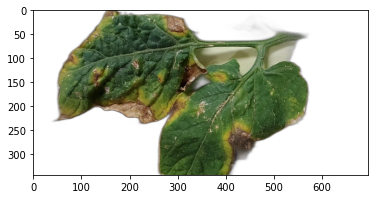

In [ ]:
from rembg import remove
import cv2
import matplotlib.pyplot as plt

input_path = '20220924_180123.jpg'
input_path = '20220924_180117.jpg'
# input_path = 'mqdefault.jpg'
input_path = 'tomato-leaves-early-blight-cropped.jpg'

model_path = '/content/gdrive/MyDrive/plant_diseases_TM/u2net.onnx'
output_path = 'output.png'

input = cv2.cvtColor(cv2.imread(input_path,), cv2.COLOR_BGR2RGB)
# plt.imshow(input)

output = remove(input, model_path=model_path)
plt.imshow(output)
# cv2.imwrite(output_path, output)

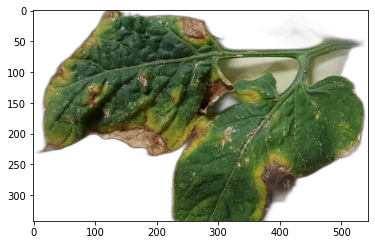

In [ ]:
import numpy as np

mask = output.astype('uint8')
# masked = cv2.bitwise_and(im,im,mask = mask)

nrow = np.sum(mask, axis=1)
nrow = np.where(nrow >0)
ncol = np.sum(mask, axis=0)
ncol = np.where(ncol >0)

masked = output[nrow[0][0]:nrow[0][-1], ncol[0][0]:ncol[0][-1]]

plt.imshow(masked)
